In [ ]:
#import all 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, BatchNormalization

In [ ]:
#download the cifar10 dataset 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

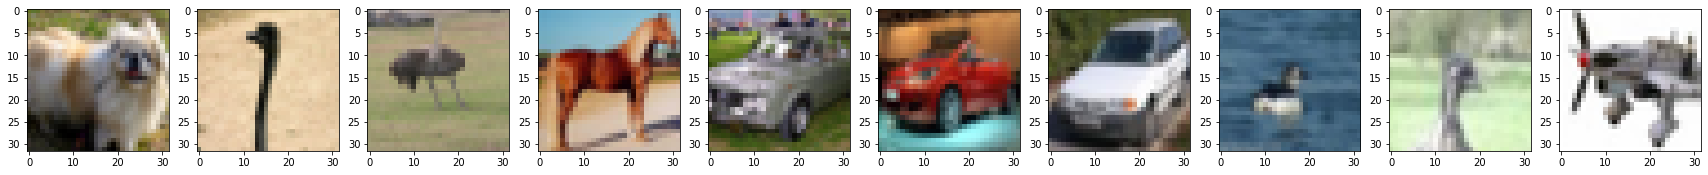

In [ ]:
#plotting the first 10 images 
fig, axes = plt.subplots(1, 10, figsize = (30, 10))
for img, ax in zip(x_train[40:50], axes):
  ax.imshow(img, interpolation = None)
plt.show()

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
#compiling the model with the adam optimizer, cross entropy loss, and accuracy as the metric
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#training the model
training_summary = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 4s 6ms/step - loss: 2.7499 - accuracy: 0.3323 - val_loss: 1.6754 - val_accuracy: 0.3872
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.5394 - accuracy: 0.4390 - val_loss: 1.4562 - val_accuracy: 0.4742
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3698 - accuracy: 0.5049 - val_loss: 1.3503 - val_accuracy: 0.5226
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 1.2159 - accuracy: 0.5646 - val_loss: 1.2497 - val_accuracy: 0.5577
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0870 - accuracy: 0.6138 - val_loss: 1.1956 - val_accuracy: 0.5781
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 0.9714 - accuracy: 0.6539 - val_loss: 1.1453 - val_accuracy: 0.6109
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 0.8497 - accuracy: 0.7004 - val_loss: 1.1268 - val_accuracy: 0.6228
Epoch 

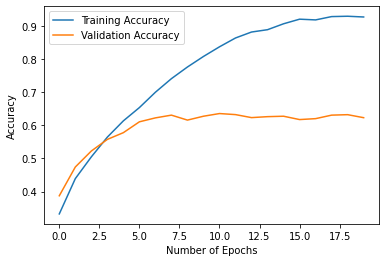

In [ ]:
plt.plot(training_summary.history["accuracy"], label = "Training Accuracy")
plt.plot(training_summary.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()


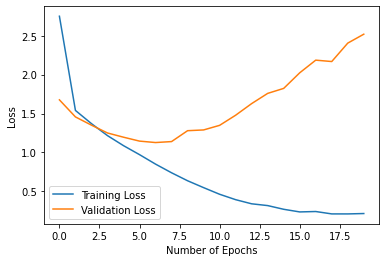

In [ ]:
plt.plot(training_summary.history["loss"], label = "Training Loss")
plt.plot(training_summary.history["val_loss"], label = "Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 2.5208 - accuracy: 0.6181 - 670ms/epoch - 2ms/step


In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, (5,5), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_2.add(Conv2D(64, (5,5), strides=(1,1), padding='same', activation='relu'))
model_2.add(MaxPool2D((2,2), strides=(2,2)))

model_2.add(Conv2D(64, (5,5), strides=(1,1), padding='same', activation='relu'))
model_2.add(MaxPool2D((2,2), strides=(2,2)))

model_2.add(Flatten())

model_2.add(Dense(units=1024, activation='relu'))
model_2.add(Dense(units=10, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [ ]:
#compiling the model with the adam optimizer, cross entropy loss, and accuracy as the metric
model_2.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#training the model
training_summary_2 = model_2.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 5s 14ms/step - loss: 3.1472 - accuracy: 0.3584 - val_loss: 1.4533 - val_accuracy: 0.4818
Epoch 2/20
313/313 [==============================] - 4s 14ms/step - loss: 1.3165 - accuracy: 0.5317 - val_loss: 1.2796 - val_accuracy: 0.5478
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 1.1171 - accuracy: 0.6040 - val_loss: 1.1786 - val_accuracy: 0.5908
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 0.9279 - accuracy: 0.6736 - val_loss: 1.1105 - val_accuracy: 0.6262
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7498 - accuracy: 0.7375 - val_loss: 1.1233 - val_accuracy: 0.6328
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.5475 - accuracy: 0.8094 - val_loss: 1.2662 - val_accuracy: 0.6286
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 0.3851 - accuracy: 0.8641 - val_loss: 1.3951 - val_accuracy: 0.6275

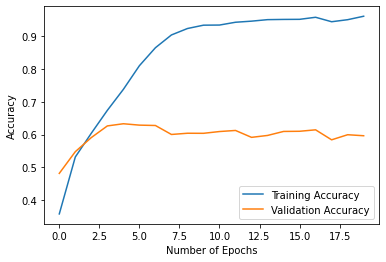

In [ ]:
plt.plot(training_summary_2.history["accuracy"], label = "Training Accuracy")
plt.plot(training_summary_2.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()

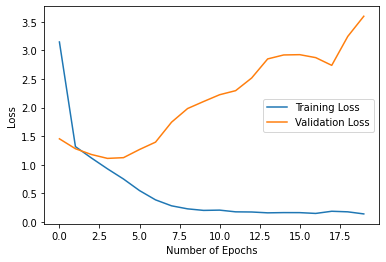

In [ ]:
plt.plot(training_summary_2.history["loss"], label = "Training Loss")
plt.plot(training_summary_2.history["val_loss"], label = "Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 3.5255 - accuracy: 0.5976 - 815ms/epoch - 3ms/step


In [ ]:
final_model = Sequential()
final_model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
final_model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'))
final_model.add(BatchNormalization())

final_model.add(MaxPool2D((2,2), strides=(2,2)))
final_model.add(Dropout(0.3))

final_model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'))
final_model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'))

final_model.add(MaxPool2D((2,2), strides=(2,2)))
final_model.add(Dropout(0.3))

# final_model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu'))
# final_model.add(Dropout(0.3))
final_model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu'))
final_model.add(MaxPool2D((2,2), strides=(2,2)))
final_model.add(Dropout(0.3))

final_model.add(Flatten())

final_model.add(Dense(units=512, activation='relu'))
final_model.add(Dropout(0.3))

final_model.add(Dense(units=10, activation='softmax'))

In [ ]:
final_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 256)      

In [ ]:
##compiling the model with the adam optimizer, cross entropy loss, and accuracy as the metric
final_model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#training the model
final_training_summary = final_model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


Epoch 1/30
313/313 [==============================] - 11s 34ms/step - loss: 1.7435 - accuracy: 0.3796 - val_loss: 1.3831 - val_accuracy: 0.5128
Epoch 2/30
313/313 [==============================] - 10s 31ms/step - loss: 1.2800 - accuracy: 0.5410 - val_loss: 1.2669 - val_accuracy: 0.5448
Epoch 3/30
313/313 [==============================] - 10s 31ms/step - loss: 1.0835 - accuracy: 0.6146 - val_loss: 1.0355 - val_accuracy: 0.6576
Epoch 4/30
313/313 [==============================] - 10s 31ms/step - loss: 0.9578 - accuracy: 0.6615 - val_loss: 0.8753 - val_accuracy: 0.6917
Epoch 5/30
313/313 [==============================] - 10s 33ms/step - loss: 0.8748 - accuracy: 0.6902 - val_loss: 0.8168 - val_accuracy: 0.7253
Epoch 6/30
313/313 [==============================] - 10s 31ms/step - loss: 0.8025 - accuracy: 0.7197 - val_loss: 0.8065 - val_accuracy: 0.7262
Epoch 7/30
313/313 [==============================] - 10s 31ms/step - loss: 0.7524 - accuracy: 0.7380 - val_loss: 0.7325 - val_accuracy:

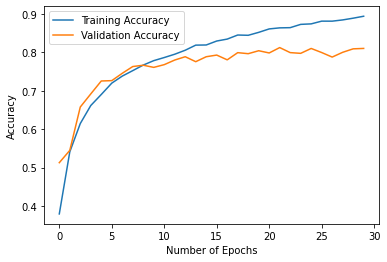

In [ ]:
plt.plot(final_training_summary.history["accuracy"], label = "Training Accuracy")
plt.plot(final_training_summary.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()

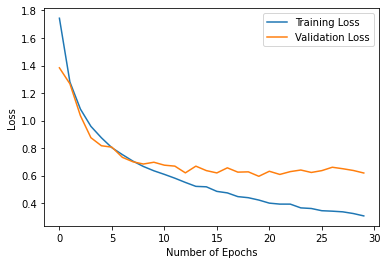

In [ ]:
plt.plot(final_training_summary.history["loss"], label = "Training Loss")
plt.plot(final_training_summary.history["val_loss"], label = "Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
final_test_loss, final_test_accuracy= final_model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.6594 - accuracy: 0.8038 - 1s/epoch - 4ms/step
